# 最適化手法毎の学習の進み方の違いを調べる

- sin関数fittingを通して,「SGD, AdaGrad, RMSprop」の学習の進み方の比較をする

# Setup

### 学習に使うsin関数に従ったランダムデータの作成
- 学習データ 800件, テストデータ 200件

In [53]:
import numpy as np

X = np.random.random(1000) * 10 - 5
Y = np.sin(X)

training_num = 800
idx = np.arange(1000)
np.random.shuffle(idx)
training_idx = idx[:training_num]
test_idx = idx[training_num:]

trainX, testX = X[training_idx], X[test_idx]
trainY, testY = np.sin(trainX), np.sin(testX)

### 実験で使う定数の定義

In [42]:
batch_size =128
nb_epoch = 1000

### 実験で使う関数の用意

In [50]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

def gen_model(optimizer):
    model = Sequential()
    model.add(Dense(30, input_shape=(1,)))
    model.add(Activation("sigmoid"))
    model.add(Dense(30))
    model.add(Activation("sigmoid"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn

def plot_training_history(model, history, testX, testY):
    predictY = model.predict(testX)
    plt.subplot(121)
    plt.plot(np.arange(len(history.history["loss"])), history.history["loss"],  color="r", alpha=0.3, label="loss")
    plt.plot(np.arange(len(history.history["val_loss"])), history.history["val_loss"], color="b", alpha=0.3, label="val_loss")
    plt.subplot(122)
    plt.plot(testX, predictY, "bo", alpha=0.3)
    plt.plot(testX, testY, "ro", alpha=0.3)
    plt.show()

In [62]:
from sklearn.metrics import classification_report

def evaluate_model(model, testX, testY):
    score = model.evaluate(testX, testY)
    print "mse=%f" % score

# 実験

### 1. ミニバッチ確率的勾配降下法 (ミニバッチSGD)
- ハイパパラメータはKerasで定義されたデフォルトのものを使用
  - `lr=0.01, momentum=0.0, decay=0.0, nesterov=False`
- 500 epoch辺りまで学習の停滞(plateau)が起こっている
- plateauにトラップされたせいで,学習が十分に進まなかった.(さらに学習時間を与えれば精度は上がりそう)

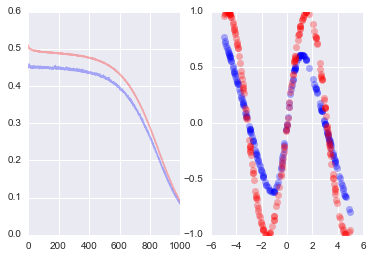

 32/200 [===>..........................] - ETA: 0smse=0.082404


In [63]:
model = gen_model("sgd")
history = model.fit(trainX, trainY, batch_size=batch_size, nb_epoch=nb_epoch, verbose=0, validation_split=0.1)
plot_training_history(model, history, testX, testY)
evaluate_model(model, testX, testY)

### 2. AdaGrad
- ハイパパラメータはKerasで定義されたデフォルトのものを使用
  - `lr=0.01`
- 学習の停滞(plateau)は見られない
- これ以上学習時間を与えても,精度はそんなに上がらなそう (グラフからじゃもう分からない)

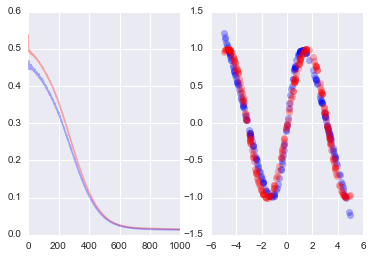

 32/200 [===>..........................] - ETA: 0smse=0.014789


In [64]:
model = gen_model("adagrad")
history = model.fit(trainX, trainY, batch_size=batch_size, nb_epoch=nb_epoch, verbose=0, validation_split=0.1)
plot_training_history(model, history, testX, testY)
evaluate_model(model, testX, testY)

### 3. RMSprop
- ハイパパラメータはKerasで定義されたデフォルトのものを使用
  - `lr=0.001, rho=0.9`
- 学習の停滞(plateau)は見られない
- 誤差の落ちるスピードがすごい早い
- これ以上学習時間を与えても,精度はそんなに上がらなそう (グラフからじゃもう分からない)

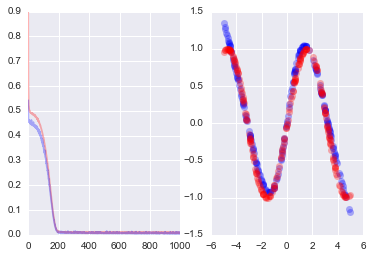

 32/200 [===>..........................] - ETA: 0smse=0.010207


In [65]:
model = gen_model("rmsprop")
history = model.fit(trainX, trainY, batch_size=batch_size, nb_epoch=nb_epoch, verbose=0, validation_split=0.1)
plot_training_history(model, history, testX, testY)
evaluate_model(model, testX, testY)